In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR


# Load data
data = pd.read_excel("/content/datainfo.xls")
# Convert date to day, month, year
data['Date'] = pd.to_datetime(data['Date'])
data['Day'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year




In [ ]:
data.head()

,Date,Hour,Cloud coverage,Visibility,Temperature,Dew point,Relative humidity,Wind speed,Station pressure,Altimeter,Solar energy,Day,Month,Year
0,2016-01-31,24,0.0,5.00,1.40,0.89,95.56,9.00,29.10,29.89,0.0,31,1,2016
1,2016-02-01,1,0.0,7.88,1.16,0.62,91.04,7.04,29.11,29.90,0.0,1,2,2016
2,2016-02-01,2,0.0,9.84,1.22,0.96,89.28,8.96,29.12,29.91,0.0,1,2,2016
3,2016-02-01,3,0.0,9.84,1.02,0.61,89.12,6.36,29.14,29.93,0.0,1,2,2016
4,2016-02-01,4,0.0,9.88,0.83,0.45,90.08,6.12,29.15,29.94,0.0,1,2,2016


In [ ]:
data.describe()

,Date,Hour,Cloud coverage,Visibility,Temperature,Dew point,Relative humidity,Wind speed,Station pressure,Altimeter,Solar energy,Day,Month,Year
count,15072,15072.000000,15072.000000,15072.000000,15072.000000,15072.000000,15072.000000,15072.000000,15072.000000,15072.000000,15072.000000,15072.000000,15072.000000,15072.000000
mean,2016-12-14 08:14:54.267515648,12.500000,0.381276,9.156738,14.378728,9.764463,72.257605,8.623589,28.582075,30.020547,910.455987,15.558055,6.220740,2016.479233
min,2016-01-31 00:00:00,1.000000,0.000000,0.000000,-19.230000,-20.780000,14.880000,0.000000,7.670000,21.880000,0.000000,1.000000,1.000000,2016.000000
25%,2016-07-06 00:00:00,6.750000,0.000000,9.960000,6.957500,3.080000,59.880000,5.040000,29.100000,29.910000,0.000000,8.000000,4.000000,2016.000000
50%,2016-12-10 00:00:00,12.500000,0.140000,10.000000,15.840000,11.000000,76.705000,7.720000,29.220000,30.030000,35.485000,15.000000,6.000000,2016.000000
75%,2017-05-24 00:00:00,18.250000,0.910000,10.000000,22.320000,17.410000,88.640000,11.760000,29.330000,30.130000,1467.312500,23.000000,9.000000,2017.000000
max,2017-10-28 00:00:00,24.000000,1.000000,10.000000,34.010000,27.310000,100.000000,41.560000,29.970000,30.780000,4733.250000,31.000000,12.000000,2017.000000
std,NaN,6.922416,0.424022,2.051405,10.146729,9.541138,20.033580,5.544649,3.520711,0.216520,1375.115617,8.769935,3.062295,0.499585


array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Hour'}>,
        <Axes: title={'center': 'Cloud coverage'}>,
        <Axes: title={'center': 'Visibility'}>],
       [<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'Dew point'}>,
        <Axes: title={'center': 'Relative humidity'}>,
        <Axes: title={'center': 'Wind speed'}>],
       [<Axes: title={'center': 'Station pressure'}>,
        <Axes: title={'center': 'Altimeter'}>,
        <Axes: title={'center': 'Solar energy'}>,
        <Axes: title={'center': 'Day'}>],
       [<Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Year'}>, <Axes: >, <Axes: >]],
      dtype=object)

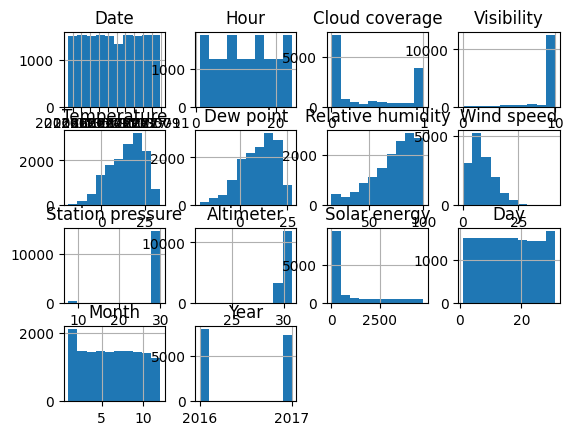

In [ ]:
data.hist()

In [ ]:
# Split data into input and output variables
X = data[['Day', 'Month', 'Year', 'Hour', 'Cloud coverage', 'Visibility', 'Temperature', 'Dew point', 'Relative humidity', 'Wind speed', 'Station pressure', 'Altimeter']]
y = data['Solar energy']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Scale data using MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
lr.score(X_test,y_test)

0.5131635828902694

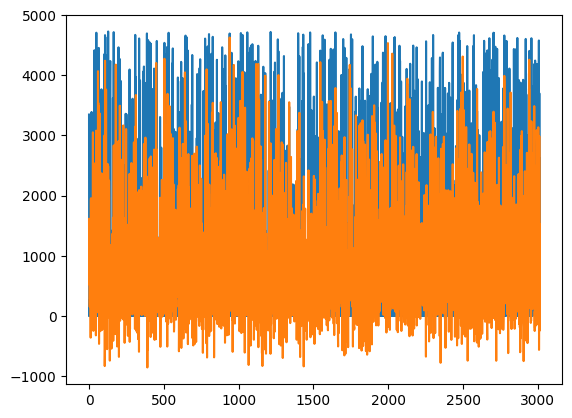

In [ ]:
xx=range(len(y_test))
plt.plot(xx,y_test)
plt.plot(xx,y_pred)

In [ ]:
#lasso
ls = Lasso()
ls.fit(X_train, y_train)
y_pred = ls.predict(X_test)
ls.score(X_test,y_test)


0.5063462997391647

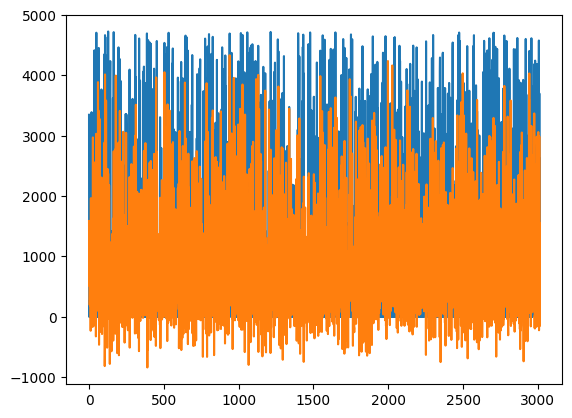

In [ ]:
xx=range(len(y_test))
plt.plot(xx,y_test)
plt.plot(xx,y_pred)

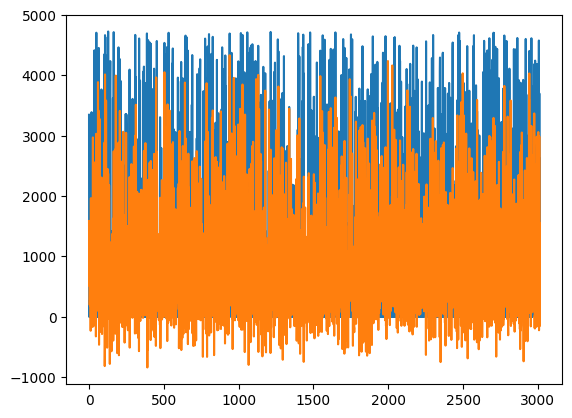

In [ ]:
xx=range(len(y_test))
plt.plot(xx,y_test)
plt.plot(xx,y_pred)

In [ ]:
xx=range(len(y_test))
plt.plot(xx,y_test)
plt.plot(xx,y_pred)

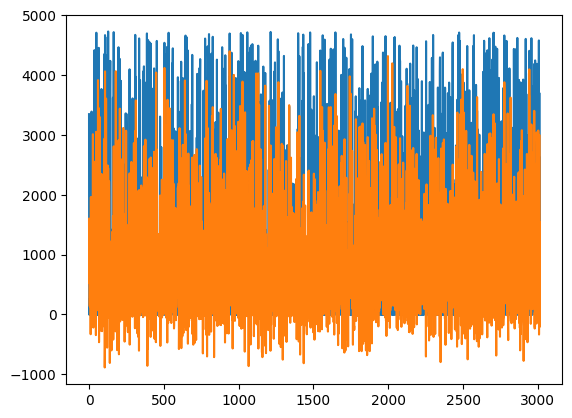

In [ ]:
#ridge
ri = Ridge()
ri.fit(X_train, y_train)
y_pred = ri.predict(X_test)
ri.score(X_test,y_test)
xx=range(len(y_test))
plt.plot(xx,y_test)
plt.plot(xx,y_pred)

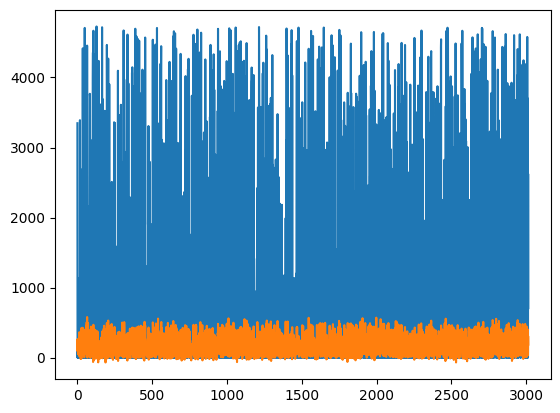

In [ ]:
#svr
svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
svr.score(X_test,y_test)
xx=range(len(y_test))
plt.plot(xx,y_test)
plt.plot(xx,y_pred)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
rfr.predict(X_test)
rfr.score(X_test,y_test)
xx=range(len(y_test))
plt.plot(xx,y_test)
plt.plot(xx,y_pred)